In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
%matplotlib inline

In [31]:
df = pd.read_csv("E:\Cornell\Fall 2020\MFE Project\sp500_features.csv")
df.head()

,gvkey,tic,conm,datadate,industry_id,trt1m,adj_ret,adj_close,cshtrm,prccm,...,ROA.1,earnings_q,earningsVol,Asset Turnover,PE,PB,PS,dividend_yield,ev_ebitda,NCFP
0,1045,AAL,AMERICAN AIRLINES GROUP INC,20150331,20,10.1879,0.101879,53.311547,395315793.0,52.780,...,0.013639,5.970000e+08,1.725000e+08,0.230265,13.129353,18.376788,3.448458,0.005627,11.923946,-0.003971
1,1045,AAL,AMERICAN AIRLINES GROUP INC,20150430,20,-8.3270,-0.085165,48.772292,235209994.0,48.285,...,0.019934,9.320000e+08,1.675000e+08,0.218975,10.295309,12.224817,3.149739,0.008201,11.760334,-0.004364
2,1045,AAL,AMERICAN AIRLINES GROUP INC,20150531,20,-12.2502,-0.122502,42.797598,256348343.0,42.370,...,0.019934,9.320000e+08,1.934123e+08,0.218975,9.034115,10.727255,2.763890,0.009346,11.138025,-0.004974
3,1045,AAL,AMERICAN AIRLINES GROUP INC,20150630,20,-5.7470,-0.057470,40.338024,300767154.0,39.935,...,0.019934,9.320000e+08,1.675000e+08,0.218975,8.514925,10.110761,2.605049,0.009916,10.881842,-0.005277
4,1045,AAL,AMERICAN AIRLINES GROUP INC,20150731,20,0.4132,0.004132,40.504689,255782039.0,40.100,...,0.035598,1.704000e+09,3.860000e+08,0.237218,6.728188,7.484021,2.568591,0.007407,10.808204,-0.005419


In [32]:
df.columns

Index(['gvkey', 'tic', 'conm', 'datadate', 'industry_id', 'trt1m', 'adj_ret',
       'adj_close', 'cshtrm', 'prccm', 'prchm', 'prclm', 'MA3', 'MA6', 'MA12',
       'EMA3', 'EMA6', 'EMA12', 'std12', 'std6', 'Size', 'PriceCap', 'ROE',
       'ROA', 'ROA.1', 'earnings_q', 'earningsVol', 'Asset Turnover', 'PE',
       'PB', 'PS', 'dividend_yield', 'ev_ebitda', 'NCFP'],
      dtype='object')

In [33]:
from datetime import datetime
df['date'] = df['datadate'].apply(lambda x: datetime(year=int(str(x)[0:4]), month=int(str(x)[4:6]), day=int(str(x)[6:8])))
df['year'] = df['date'].apply(lambda x: x.year)

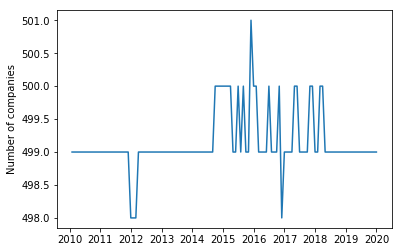

In [34]:
com_per_y = df.groupby(df['date'])['conm'].nunique()
plt.figure()
plt.plot(com_per_y)
plt.ylabel('Number of companies')
plt.show()

In [35]:
df_new = df[df.columns.difference(['gvkey', 'tic', 'conm', 'datadate', 'date'])]
df_new.head()

,Asset Turnover,EMA12,EMA3,EMA6,MA12,MA3,MA6,NCFP,PB,PE,...,earnings_q,ev_ebitda,industry_id,prccm,prchm,prclm,std12,std6,trt1m,year
0,0.230265,9.734904,4.680056,6.756703,3.625550,-0.165567,7.367117,-0.003971,18.376788,13.129353,...,5.970000e+08,11.923946,20,52.780,56.05,46.47,10.261756,10.488511,10.1879,2015
1,0.218975,8.306484,1.420124,4.575321,3.279992,-0.113200,3.174883,-0.004364,12.224817,10.295309,...,9.320000e+08,11.760334,20,48.285,53.47,46.88,10.612339,10.967431,-8.3270,2015
2,0.218975,6.684272,-2.003892,2.146319,1.049658,-3.463100,-1.760817,-0.004974,10.727255,9.034115,...,9.320000e+08,11.138025,20,42.370,50.30,41.32,10.846595,9.918246,-12.2502,2015
3,0.218975,5.705219,-2.940990,1.008521,-0.010267,-8.774733,-4.470150,-0.005277,10.110761,8.514925,...,9.320000e+08,10.881842,20,39.935,44.38,38.45,10.836692,7.913992,-5.7470,2015
4,0.237218,5.289197,-2.101555,0.922818,0.802025,-5.861333,-2.987267,-0.005419,7.484021,6.728188,...,1.704000e+09,10.808204,20,40.100,43.81,37.80,10.432017,7.844718,0.4132,2015


In [21]:
df_nor = df_new.groupby(['industry_id', 'year']).transform(lambda x: (x - x.mean()) / x.std())

In [36]:
df_fin = pd.concat([df[['gvkey', 'tic', 'conm', 'datadate', 'date','year','industry_id']], df_nor], axis=1)
df_fin.head()

,gvkey,tic,conm,datadate,date,year,industry_id,Asset Turnover,EMA12,EMA3,...,dividend_yield,earningsVol,earnings_q,ev_ebitda,prccm,prchm,prclm,std12,std6,trt1m
0,1045,AAL,AMERICAN AIRLINES GROUP INC,20150331,2015-03-31,2015,20,-0.052252,6.324247,2.038301,...,-1.233544,0.049112,0.242084,-0.542382,-0.659024,-0.657789,-0.738828,2.720781,2.093430,1.606683
1,1045,AAL,AMERICAN AIRLINES GROUP INC,20150430,2015-04-30,2015,20,-0.120969,5.300898,0.619841,...,-0.964467,0.042397,0.562828,-0.594068,-0.751630,-0.709152,-0.730031,2.923970,2.305866,-1.182384
2,1045,AAL,AMERICAN AIRLINES GROUP INC,20150531,2015-05-31,2015,20,-0.120969,4.138713,-0.870014,...,-0.844782,0.077196,0.562828,-0.790659,-0.873491,-0.772261,-0.849328,3.059738,1.840476,-1.773371
3,1045,AAL,AMERICAN AIRLINES GROUP INC,20150630,2015-06-30,2015,20,-0.120969,3.437300,-1.277763,...,-0.785211,0.042397,0.562828,-0.871589,-0.923657,-0.890117,-0.910907,3.053999,0.951444,-0.793735
4,1045,AAL,AMERICAN AIRLINES GROUP INC,20150731,2015-07-31,2015,20,-0.009934,3.139253,-0.912509,...,-1.047553,0.335827,1.301975,-0.894852,-0.920258,-0.901465,-0.924854,2.819460,0.920716,0.134231


In [37]:
df_fin.columns

Index(['gvkey', 'tic', 'conm', 'datadate', 'date', 'year', 'industry_id',
       'Asset Turnover', 'EMA12', 'EMA3', 'EMA6', 'MA12', 'MA3', 'MA6', 'NCFP',
       'PB', 'PE', 'PS', 'PriceCap', 'ROA', 'ROA.1', 'ROE', 'Size',
       'adj_close', 'adj_ret', 'cshtrm', 'dividend_yield', 'earningsVol',
       'earnings_q', 'ev_ebitda', 'prccm', 'prchm', 'prclm', 'std12', 'std6',
       'trt1m'],
      dtype='object')